<a href="https://colab.research.google.com/github/casoetan/human_pose_est/blob/getting_data/getting_data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat

--2020-02-08 13:07:01--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  54.3MB/s    in 3.5s    

2020-02-08 13:07:05 (49.4 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]



In [0]:
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2020-02-08 13:07:05--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  36.7MB/s    in 1.7s    

2020-02-08 13:07:07 (36.7 MB/s) - ‘test_32x32.mat’ saved [64275384/64275384]



In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import skimage.io
training_data = sio.loadmat('train_32x32.mat')

In [0]:
x_train = training_data['X']
y_train = training_data['y']

Digit Label: [5]


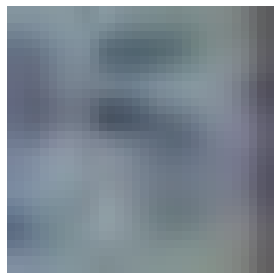

In [214]:
image_index = 5
plt.axis('off')
io.imshow(x_train[:,:,:,image_index])
print(f'Digit Label: {y_train[image_index]}')

In [215]:
y_train[52]

array([10], dtype=uint8)

In [0]:
y_train2 = np.where(y_train==10, 0, y_train)

In [217]:
y_train2[52]

array([0], dtype=uint8)

In [0]:
# This code downloads the coco dataset from Amazon S3 in parallel.
import boto3
from botocore import UNSIGNED
from botocore.client import Config
import multiprocessing
import subprocess
files = ['val2017.zip', 'annotations_trainval2017.zip', 'train2017.zip']

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
def download_and_unzip_from_s3(file_name, bucket_name='fast-ai-coco'):
    print("Downloading", file_name)
    s3.download_file(bucket_name, file_name, file_name)
    print("Finished downloading", file_name, ". Starting to unzip.")
    subprocess.run(["unzip", file_name])
    print("Finished unzipping", file_name)

# Download in parallel
num_cpus = multiprocessing.cpu_count()
with multiprocessing.Pool(num_cpus) as p:
    p.map(download_and_unzip_from_s3, files)

print("Done transferring all datasets")

Finished downloading annotations_trainval2017.zip . Starting to unzip.
Finished downloading val2017.zip . Starting to unzip.
Finished unzipping val2017.zip
Finished unzipping annotations_trainval2017.zip
Finished downloading train2017.zip . Starting to unzip.
Finished unzipping train2017.zip
Done transferring all datasets


In [0]:
from pycocotools.coco import COCO
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [0]:
ann_file = 'annotations/instances_train2017.json'

In [220]:
coco = COCO(ann_file)

loading annotations into memory...
Done (t=13.77s)
creating index...
index created!


In [221]:
categories = coco.loadCats(coco.getCatIds())
print(categories[0])

category_names = [category['name'] for category in categories]
print(', '.join(category_names))

super_category_names = set([category['supercategory'] for category in categories])
print('--------------------')
print('Super Categories')
print(', '.join(super_category_names))

{'supercategory': 'person', 'id': 1, 'name': 'person'}
person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee, skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket, bottle, wine glass, cup, fork, knife, spoon, bowl, banana, apple, sandwich, orange, broccoli, carrot, hot dog, pizza, donut, cake, chair, couch, potted plant, bed, dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone, microwave, oven, toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair drier, toothbrush
--------------------
Super Categories
sports, person, vehicle, kitchen, animal, electronic, appliance, accessory, indoor, outdoor, food, furniture


In [0]:
person_category_id = coco.getCatIds(catNms=['person'])
image_ids = coco.getImgIds(catIds=person_category_id)

In [223]:
image_id = coco.getImgIds(imgIds = [len(image_ids)])
print(image_id)

[64115]


In [0]:
# image = coco.loadImgs(image_ids[np.random.randint(0,len(image_ids))])
image = coco.loadImgs(521679)

In [0]:
image = image[0]

In [226]:
image

{'coco_url': 'http://images.cocodataset.org/train2017/000000521679.jpg',
 'date_captured': '2013-11-23 04:00:15',
 'file_name': '000000521679.jpg',
 'flickr_url': 'http://farm4.staticflickr.com/3008/2853725049_0920f003c4_z.jpg',
 'height': 640,
 'id': 521679,
 'license': 1,
 'width': 429}

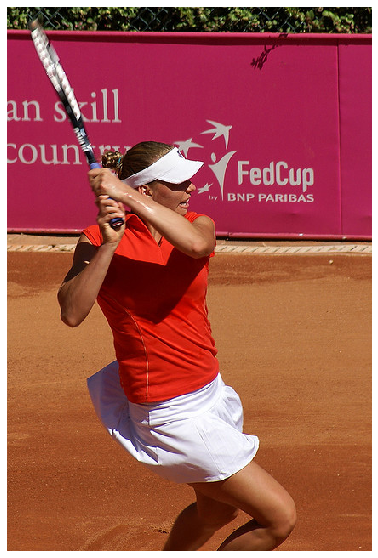

In [227]:
read_image = io.imread(image['coco_url'])
plt.axis('off')
plt.imshow(read_image)
plt.show()

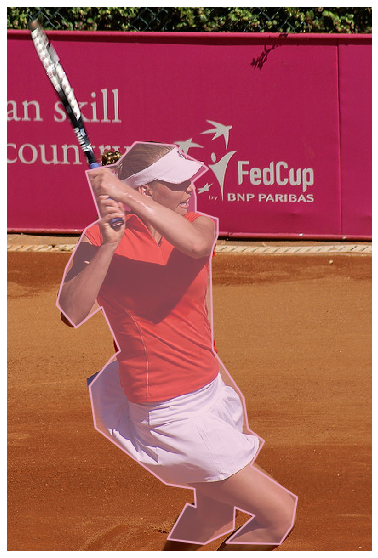

In [228]:
plt.imshow(read_image)
plt.axis('off')
ann_ids = coco.getAnnIds(imgIds=image['id'], catIds=person_category_id, iscrowd=None)
anns = coco.loadAnns(ann_ids)
coco.showAnns(anns)

In [229]:
ann_keypoints_file = './annotations/person_keypoints_train2017.json'
coco_keypoints = COCO(ann_keypoints_file)

loading annotations into memory...
Done (t=6.59s)
creating index...
index created!


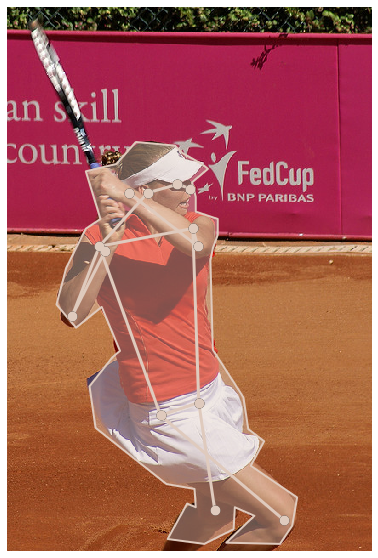

In [230]:
annotated_image = plt.imshow(read_image)
plt.axis('off')
ax = plt.gca()
ann_ids = coco_keypoints.getAnnIds(imgIds=image['id'], catIds=person_category_id, iscrowd=None)
anns = coco_keypoints.loadAnns(ann_ids)
coco_keypoints.showAnns(anns)

In [0]:
bbox = anns[0]['bbox']

In [0]:
import skimage.transform as st

x,y,w,h = [int(i) for i in bbox]
cropped_image = read_image[y:y+h, x:x+w]

final_image = st.resize(cropped_image, (256,192))

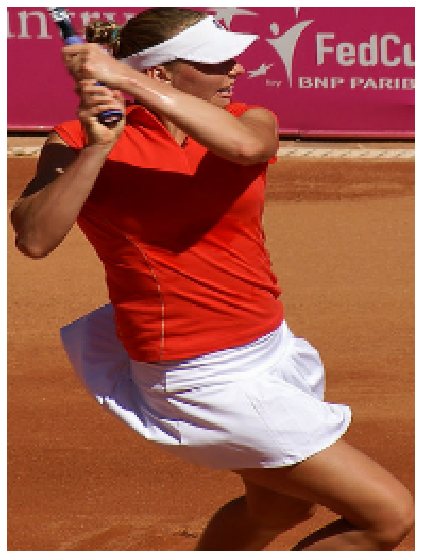

In [262]:
plt.imshow(final_image)
plt.axis('off')
ann_ids = coco_keypoints.getAnnIds(imgIds=image['id'], catIds=person_category_id, iscrowd=None)
anns = coco_keypoints.loadAnns(ann_ids)

In [263]:
final_image.shape

(256, 192, 3)

In [264]:
from itertools import tee
key_points = anns[0]['keypoints']
points = []
last_point = tuple()
for i in key_points:
  last_point += (i,)
  
  if len(last_point) == 3:
    points.append(last_point)
    last_point = tuple()
  
points

[(215, 213, 2),
 (0, 0, 0),
 (200, 208, 2),
 (0, 0, 0),
 (165, 218, 2),
 (218, 260, 2),
 (108, 281, 2),
 (224, 281, 2),
 (76, 363, 2),
 (143, 218, 2),
 (115, 286, 2),
 (225, 465, 2),
 (180, 480, 2),
 (244, 592, 2),
 (325, 603, 2),
 (0, 0, 0),
 (0, 0, 0)]

In [0]:
import albumentations as A

In [269]:
bbox1 = A.convert_bbox_to_albumentations(bbox=bbox, source_format='coco', rows=1, cols=4)
A.normalize_bbox(bbox1, rows=1, cols=4)

[3.595625, 158.2, 21.303125, 631.37]

In [0]:
transformer = A.Compose(
    [
     albu.Crop(x,y,x+w,y+h),
     albu.Resize(256,192)
    ],
)

In [0]:
m = coco.annToMask(anns[0])

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


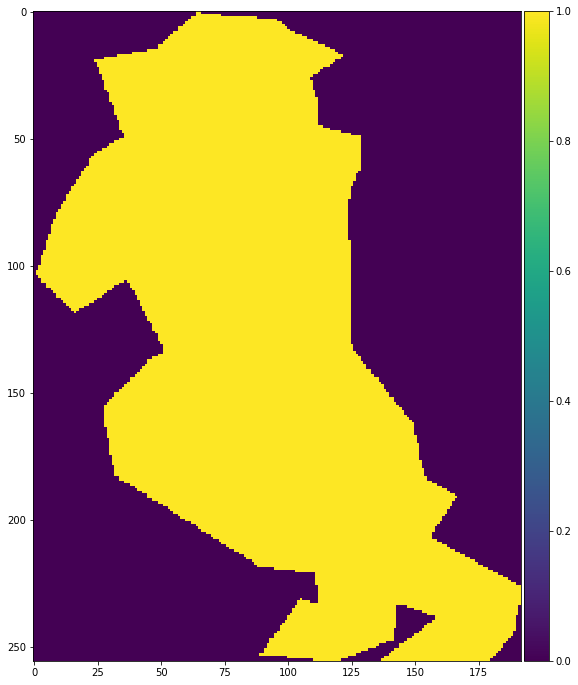

In [275]:
i = transformer(image=read_image, mask=m, bboxes=[bbox1])
io.imshow(i['image'])
io.imshow(i['mask'])

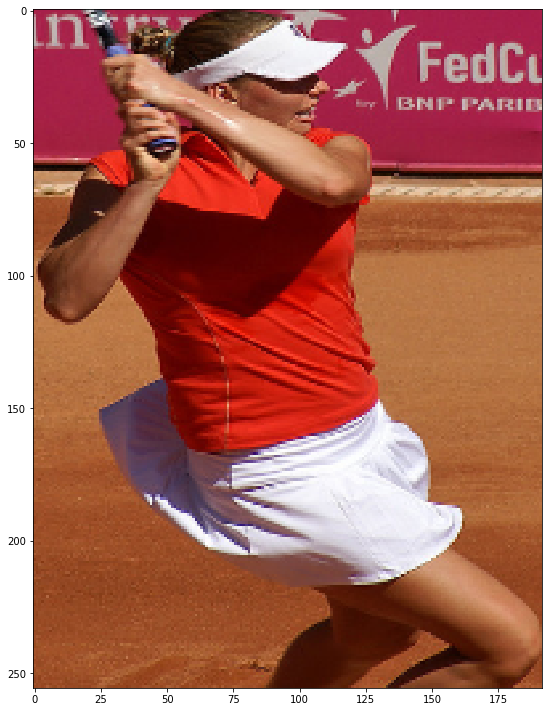

In [283]:
i = transformer(image=read_image, mask=m, bboxes=[bbox1])
io.imshow(i['image'])
# coco_keypoints.showAnns(anns)